# The Perceptron


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Table of Notation

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\Im}{\mathbf{I}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
\newcommand{\xspace}{\mathcal{X}}
\newcommand{\yspace}{\mathcal{Y}}
$

| Symbol                | Meaning                       | Symbol                                              | Meaning                        |
|-----------------------|-------------------------------|-----------------------------------------------------|--------------------------------|
| $D$                   | dataset                       | $h$<br>$f$                                          | hypothesis function            |
| $\Xm$                 | input matrix                  | $x_{i,j}$                                           | $i$th row and $j$th column     |
| $\xv$<br>$\vec{x}$    | feature/input vector          | $x_i$                                               | $i$th element                  |
| $\Ym$<br>$\Tm$        | labels/targets matrix         | $\yv$<br>$\tv$                                      | labels/targets vector          |
| $N$                   | number of features or columns | $M$                                                 | number of data samples or rows |
| $n$                   | feature or column index       | $m$                                                 | data sample or row index |
| $(\xv, \yv)$          | training sample               | $(\xv', \yv')$                                      | testing sample                 |
|      $\Im$                 | identity matrix                               | $\hat{\yv}$<br>$f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions                    |
| $b$                   | bias or y-intercept term      | $w$<br>$\wv$<br>$\Wm$                               | wights                         |
| $E$                   | error                         | $SSE$                                               | sum of squared error function  |
| $MSE$                 | mean squared error   | $\lambda$ | reguarlization term
| $||\cdot||$| norm | $\nabla$ | gradient (nabla)   
| $\alpha$  |  learning rate (alpha)  | $T$ |  Threshold   
|$z$<br>$\zv$ |  value before applying activation function   | |  

## Review

### Classification
<center><img src="https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png"></center>


Recall that for classification, the goal is to predict some discrete labels, otherwise known as classes.  Thus, if we have 3 classes, the corresponding labels could be $y \in \{0, 1, 2\}$. Further, the predictions will follow suit by attempting to predict the same discrete values $\hat{y} = \{0, 1, 2\}$. 

In this module, we are going to focus on *binary classification*. Binary classification entails that the dataset has only two class. For example, let's say we have two classes: A and B. The goal is to then predict a given data sample as either A or B. This is an example of a binary classifier whose labels could be $y \in \{0,1\}$ and the predictions would also then be $\hat{y} \in \{0,1\}$. Here we can say class A corresponds to the label 0, $y=0$, and class B corresponds to the label of 1, $y=1$.


By learning to predict a given class label, we can think of the model as trying to “separate” the data as seen in the above image. With simple 2D and 3D datasets we can actually use the weights to draw decision boundaries just like this!



### Linear Models
Further, recall, a model can make a prediction by taking the dot product of the weights $\wv$ and input features $\Xm$. Here $\Xm$ is a matrix, and  $\wv$ is a column vector, meaning we are computing the predictions for **MULTIPLE** data samples at once and thus the output would be a **vector** $\hat{\yv}$. 

$$ \hat{\yv} = \Xm \wv $$

In the above equation, $\hat{\yv} = [\hat{y}_0; \hat{y}_1; \dots; \hat{y}_M]$ is a vector which holds the predicted real valued (continuous) outputs each of the $m$ data samples such that $\hat{\yv} \in \mathbb{R}^M$.


Instead, if a feature vector $\xv$ is given as a column vector, then we would compute predictions for a **SINGLE** data sample and thus the output would be a **scalar** $\hat{y}$. 

$$ \hat{y} = \wv^\top \xv $$

In the above equation, $\hat{y}$ is a scalar which holds the predicted real valued (continuous) output $\hat{y} \in \mathbb{R}$.

Further, recall that we should always assume the first column of $\Xm$ contains the bias column (columns of ones) such that $\Xm \wv = \Xm \wv + \bv$ is true. The same is true for $\xv$ whose first element is the bias term (i.e., a 1) such that  $\wv^\top \xv = \wv^\top \xv +b$ is true. We move the bias term inside $\Xm$ and $\xv$ so that our equations are cleaner. **Moving forward, if the bias is not included inside $\Xm$ or $\xv$ it will be explicitly stated!**

The question is then the following: how can we use a linear model with continuous outputs for classification such that we predict discrete labels like $\{0, 1\}$? 

## Linear Regression to Classification
The answer is actually relatively simple, we need to discretize the values of  $\hat{\yv}$. To do so, we often use what are called [*activation functions*](https://en.wikipedia.org/wiki/Activation_function) which simply convert inputs into new values using a function. The most naive activation function we can apply is a thresholding function, which turns continuous values into discrete values. 

Thus, given a threshold $T$, if the output $\hat{y}$ is greater than the threshold $T$ we assume it belongs to the 1st class. If the output value $\hat{y}$ is less than or equal to threshold $T$ it then belongs to 2nd class (or vice versa).  For binary classification, we often use the two discrete values such as [0, 1] or [-1, 1] as the class labels.

Mathematically, we write a thresholding function using an *indicator function* defined as follows:

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv - T > 0 \\
0  \quad &\text{else} \tag{1} \\
\end{cases}
$$

The intuition for $\wv^\top \xv - T > 0$ is that any prediction $\wv^\top \xv$ minus the threshold $T$ must be a positive number if the prediction is larger than the threshold $\wv^\top \xv > T$. Likewise, any prediction $\wv^\top \xv$ minus the threshold $T$ that is negative can then be assumed to less than the threshold $\wv^\top \xv < T$. Remember, this is just basic subtraction rules, a larger number minus a smaller number is positive while a smaller number minus a larger number is negative!

As such, we could write the same indicator function as given below.

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv  > T \\
0  \quad &\text{else} \tag{2} \\
\end{cases}
$$

**However, Eq. 1 is much more convenient than Eq. 2 because we can essentially treat the threshold $T$ the same as bias $b$ in the linear regression equation $\hat{y} = \wv^\top \xv + b$**. In Eq. 2 we would have to manually set a threshold, whereas in Eq. 1 we can treat the threshold $T$ the same as the bias $b$ such that we leave finding the best threshold or bias up to the model. In doing so, the model automatically learns the best threshold (just like how linear regression models learn the best bias or y-intercept term)!

With these ideas in mind, we can now look at the perceptron algorithm!

# Rosenblatt's Perceptron Algorithm

## General Structure

The perceptron algorithm was originally developed back in 1957 by Frank Rosenblatt. It is one of the first artificial neural networks architectures. Meaning, the perceptron attempts to replicate a biological neuron in the most naive manner. 

Below, is an example of what a biological neuron looks like. The basic idea here is as follows:
1. The dendrites take in inputs from other neurons. 
2. The inputs from the dendrites are summed in the cell body until a threshold is exceeded.
3. Once this threshold is exceeded, the cell fires, sending a signal all the down the axon to the axon terminals. 
4. The axon terminals then distribute the output of the cell to other neurons.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png" width=500 height=500></center>

Now, the perceptron algorithm applies these ideas summing the inputs, thresholding, and then outputting information in the most basic fashion as depicted in the below image. In summary, the below image depicts the below steps, where the predictions $y$ in the image is equivalent to $\hat{y}$ in our notation.

<center><img src="http://neuron.eng.wayne.edu/tarek/MITbook/chap3/img00001.gif"></center>

1. First, just like in linear modeling, we take the dot product of our input features $\xv$ and weights $\wv$ (with a bias/threshold term added). Recall that taking the dot product is the same as multiplying each feature by the corresponding weight and summing! This gives us a continuous value, we will refer to as $z$ when using a single data sample $\xv$. When using ALL or a mini-batch of our data $\Xm$, the output would be a vector of continuous values $\zv$.

$$
z = \wv^\top \xv
$$

2. Next, an *activation function* is applied to our continuous values $z$. In particular, the perceptron uses thresholding function called the $\sign$ function which squashes the continuous values into discrete values of [-1, 1] giving us our prediction $\hat{y}$.

$$
\hat{y} = \sign(z)
$$



Welp, given the idea of the perceptron, we can see that almost all the steps are the same as we have seen in linear regression already - except for applying the activation function. Let's look at how this $\sign$ activation function works briefly.

### Activation Function

**The most important thing about the perceptron is that the $\sign$ function requires the class labels of [-1, 1] instead of [0, 1].** In coming weeks we will see how to make the perceptron into a more robust algorithm that also uses the class labels of [0, 1].

So why do we need the class labels [-1, 1] specifically? Well, this is because the $\sign$ function simply takes the sign (- or +) of the continuous valued output. By doing so, it converts all continuous outputs into discrete outputs of [-1, 1].  

How do we write the $\sign$ function in more mathematical terms? Well, we can write it just like the $\{0, 1\}$ indicator function we defined in Eq. $1$. 

However now, we will now use the labels [-1, 1].

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv - T > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$

Also recall that the threshold $T$ is actually akin the the bias term $b$ which we used in previously in linear regression modeling. This because the bias $b$ and threshold $T$ act in the exact same manner in our equation. Remember that if we remove the bias term from the weights $\wv$ then we have $\wv^\top \xv + b$. Next, notice this is the same equation as  $\wv^\top \xv - T$ except there is a minus sign. Thus, we can treat the two equations as the same if $b = -T$. Note that in practice, the sign of the bias function doesn't matter! That's it, the reasoning for treating the threshold and bias as the same thing is as simple as that. We can rewrite our sign function definition again as follows:
$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv + b > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$
Now we can reintegrate the bias $b$  (i.e., threshold $T$) back into our weight matrix to compress the notation to the following:
$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$


Thus, our final definition of the $\sign$ function is as follows:

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$

Visually, the $\sign$ function looks like the below plot. You might be wondering, what happens if our prediction is exactly zero such that $z = \wv^\top \xv = 0$? Does it get assigned the label 1 or-1? Welp, this tie is actually arbitrary, but typically we just assign any continuous predictions $z$ of 0 to have a label of -1. 

<!-- Furthermore, notice that this function is not differentiable at zero! This will become important shortly. -->

#### Sign Function Code


Below is code showing off how the sign function works.

In [2]:
x = np.linspace(-10, 10)
y = np.sign(x)

Random inputs `x`.

In [3]:
x

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

Values of inputs `x` after being transformed by the $\sign$ activation function.

In [4]:
np.sign(x)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

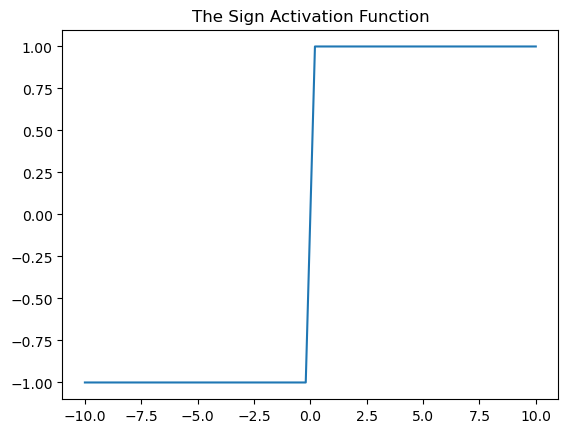

In [5]:
plt.plot(x, y)
plt.axis('tight')
plt.title('The Sign Activation Function')
plt.show()

## The Perceptron Learning Rule
So how then do we learn the weights for the perceptron algorithm? What error function do we even use? We could formulate the Perceptron's error function as *minimizing* the number of misclassified data samples (i.e., predicting the wrong label for a given data sample) given as follows:

$$
\begin{align}
J(\wv) &= \min_\wv - \sum_{m=0}^\mathcal{M} \Big(\sign(\wv^\top \xv_m)y_m) \\
&= \min_\wv - \sum_{m=0}^\mathcal{M} \Big(\hat{y}y_m \Big)  \\
\end{align}
$$

where in this equation:
- $\mathcal{M}$ is the set of data samples in $X$ that are **misclassified**
- $\sign(\wv^\top \xv_m)$ represents the prediction $\hat{y}$ after multiplying and summing the inputs and weights and after applying the activation function, which is the $\sign$ function. Thus, $\sign(\wv^\top \xv_m) = \hat{y}$. 

We multiply by the label $y$ because if a sample is misclassified, then the sign of the label will not match the sign of prediction $\hat{y}$. This means that $\hat{y}y_m = -1$ is always true for misclassified samples. Below is a table of the possible ways a misclassification could happen.


| $\hat{y}$ | $y$ | $\hat{y}$$y$|
|---|---|:------|
| -1 | 1 |-1|
| 1 | -1 |-1|


Thus, in the above error function, we are summing negative values and then taking the negative of the sum to compute the total number of samples misclassified. This is just a complex mathematical way of saying we want to minimize the number of misclassifications

However, the issue with this error function is that it contains the $\sign$ function. Recall, that the $\sign$ function is **NOT differentiable at zero**. This means we can't apply any optimizations techniques that we have used so far to find the best weights for our training data.

Luckily, Rosenblatt was able to come up with a very clever rule to update the weights **that is guaranteed to converge IF the data is linearly separable.** Let's take a look at this weight update learning rule.

### Weight Update
Rosenblatt came up with the following **online learning** weight update rule that is applied ONLY when a data sample is misclassified:

$$
\wv_{k+1} = \wv_k + \alpha y_m \xv_m
$$

where in this equation:
- $\wv_{k+t}$ are the weights AFTER being updated. 
- $\wv_{k}$ are the weights BEFORE being updated.
- $k$ is just notation to help us distinguish the weights before being updated, and $k+1$ is used to help us distinguish the weights after being updated.
- $\alpha$ is the learning rate
- $y_m$ is the label for the current data sample
- $\xv_m$ is the current data sample's feature vector.
- $m$ is just used to indicate which data sample we are currently using for the update.

Notice that this equation looks oddly like online gradient descent. However, keep in mind, we can NOT perform gradient descent since the error function is not differentiable. So how did Rosenblatt come up with this weight update? While we will not dive into the theoretical proof here, intuitively, we can break down this equation piece-by-piece and see why it works.

To understand this equation, we need to look at what happens when the perceptron misclassifies a given data sample. Recall that there are only two ways to misclassify binary labels, which are given as follows:

| $\hat{y}$ | $y$ |
|---|---|
| -1 | 1 |
| 1 | -1 |


#### Case 1: Predicting -1 instead of 1
In the first case, we predict a negative value $\hat{y}=-1$ when we should have predicted positive $y=1$. Thus, we can say that the predicted value $z_m$ BEFORE applying the sign was some continuous value that was less than 0. 
$$
z_m = \wv_{k} ^\top \xv_m < 0.
$$

To fix this misclassification error, we want to update the weight $\wv_{k}$ by **INCREASING** the predicted output $\wv_{k} \xv_m$. Thus, we want the new weights $w_{k+t}$ to predict a larger or non-negative value instead.

$$
 \wv_{k+1} ^\top  \xv_m >  \wv_{k}^\top  \xv_m.
$$

We do this by using a very basic linear algebra rule: [vector addition/subtraction](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/adding-vectors). Vector addition/subtraction says that when we add or subtract any two vectors, the sum or difference is a vector in the direction of both of the vectors. 

Geometrically speaking, adding the feature vector to the weight vector moves the weight vector's decision boundary in the direction of the feature vector $\xv_m$, thus moving the decision boundary to be closer to correctly classifying $\xv_m$. However, just like in gradient descent, we don't want to move our weights drastically. This is why we scale the feature vector $\xv_m$ by the learning rate $\alpha$.

$$
\wv_{k+1} = \wv_{k} + \alpha \xv_m
$$


#### Case 2: Predicting 1 instead of -1
In the second case, we predict a positive value $\hat{y}=1$ when we should have predicted a negative value $y=-1$. Thus, we can say that the predicted value $z_m$ BEFORE applying the sign was greater than 0. 

$$
z_m = \wv_{k}^\top  \xv_m > 0.
$$

To fix this misclassification error, we want to update the weight $\wv_{k}$ by DECREASING the predicted output $\wv_{k} \xv_m$. Thus, we want our new weights $\wv_{k+1}$ to predict a smaller or negative value instead.

$$
 \wv_{k+1}^\top  \xv_m <  \wv_{k}^\top  \xv_m.
$$

Thus, geometrically, we want to move the weight vector's decision boundary in the direction of the feature vector $\xv_m$. However, this time we want to **SUBTRACT** the feature vector $\wv_m$ since we want the weights to predict a negative value.

$$
\wv_{k+1} = \wv_{k} - \alpha \xv_m
$$




#### Accounting for both cases
To account for both instances of misclassification, we can use a simple trick. This trick is to simply multiply $ \alpha \xv_m$ by current data sample's label $y_m$ in our update. **Recall that we only apply this weight update for misclassified samples.** Thus, the label $y_m$ will change the addition sign to a minus if $y_m=-1$. Likewise, the label $y_m$ will keep the addition sign  if $y_m=1$.

$$
\wv_{k+1} = \wv_k + \alpha y_m \xv_m
$$

See the below GIF which visually represents everything we just went over!

- **green line** represents the decision boundary determined by the weights.
    - The **green line with an arrow with a circle on the end** represents the direction of the weight vector. To determine the decision boundary, we take a line perpendicular or *orthogonal* to the weight vector. 
- **yellow line with an arrow** represents the direction of the feature vector $\xv_m$.
- **red line with an arrow** represents the scaled direction of the vector $\alpha y_m \xv_m$.

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fa%2Faa%2FPerceptron_training_without_bias.gif&f=1&nofb=1" width=500 height=500></center>

## Pseudocode


<center><img src="https://live.staticflickr.com/65535/54016935523_0935456935_h.jpg" width="1563" height="756" alt="The Perceptron Pseudocode"/></center>

## Properties and Issues

### Linear Separable
The perceptron is guaranteed to converge within a finite number of epochs or iterations only if the data is linearly separable. One issue is we typically do not know how many epochs are required even if the data is linearly separable. However, we can say that eventually a solution will be found that perfectly divides the two classes.

When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iterations or epochs. Recall, 1 epoch equates to one pass over the dataset where each data sample is used to update the weights once. 

### Binary Classification
The next major assumption that Perceptron's make is that the data has only 2 classes. The issue here being that most real-world problems require multi-classification where there are multiple classes!

### Summary

The major issues with the perceptron is that most real-world datasets are not linear, and most aren't even linearly separable. Furthermore, the real-world datasets do not typically have only 2 classes. All these assumptions make it, so Rosenblatt's perceptron is rarely used today. That being said, there are changes that can be made to the perceptron to make it much more robust.

## Training Rosenblatt's Perceptron

Below are examples of training done on separable and non-separable linear data. To do so, we use Sklearn's `Perceptron` class and the `plot_decision_boundry()` (defined below) to visualize the decision boundary. 

In [6]:
from sklearn.linear_model import Perceptron

In [7]:
def plot_decision_boundry(X, y, w):
    line_X = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), len(X)).reshape(-1,1)

    slope = -(w[0] / w[2]) / (w[0] / w[1])
    y_intercept = -w[0]/ w[2]

    decision_boundry = slope * line_X + y_intercept
 
    class1 = np.where(y == -1)[0]
    class2 = np.where(y == 1)[0]
    plt.plot(X[class1, 1], X[class1, 2], 'or', label='class1')
    plt.plot(X[class2, 1], X[class2, 2], 'xb', label='class2')
    plt.plot(line_X, decision_boundry)
    plt.ylim(np.min(X[:, 2])-1, np.max(X[:, 2])+1)
    plt.xlim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
    plt.legend()

### Linear Separable Data

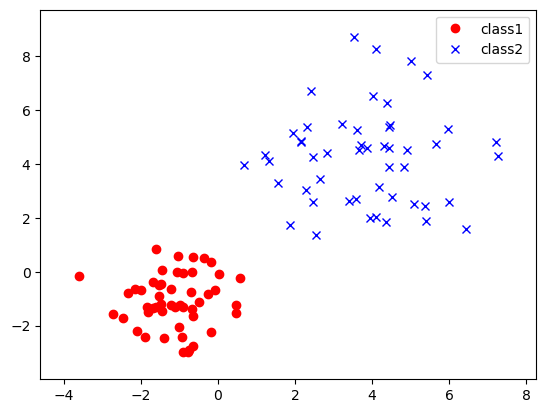

In [8]:
def separable_data():
    mu1 = [-1, -1]
    cov1 = np.eye(2)

    mu2 = [4,4]
    cov2 = np.eye(2) * 3
    rng = np.random.RandomState(42)
    class1 = rng.multivariate_normal(mu1, cov1, 50)
    class2 = rng.multivariate_normal(mu2, cov2, 50)
    
    y = np.ones(len(class1)+len(class2))
    y[:len(y)//2] = -1

    return class1, class2, y

def plot_separable_data():
    class1, class2, _ = separable_data()
    data = np.vstack([class1, class2])
    plt.plot(class1[:, 0], class1[:, 1], 'or', label='class1')
    plt.plot(class2[:, 0], class2[:, 1], 'xb', label='class2')
    
    plt.xlim([np.min(data[:, 0])-1, np.max(data[:, 0])+1])
    plt.ylim([np.min(data[:, 1])-1, np.max(data[:, 1])+1])
    plt.legend()
    plt.show()
    
plot_separable_data();

Run the below code and watch as the decision boundary (given by the blue line) as it quickly finds a boundary that easily separates the two classes. Note that `class1` has the label -1 and `class2` has the label 1.

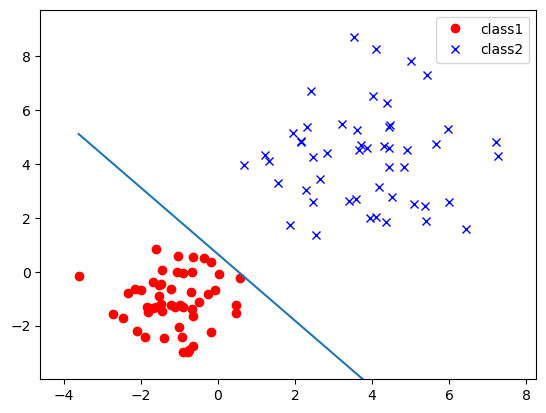

In [9]:
class1, class2, y = separable_data()
X = np.vstack((class1, class2)) # Combine class data
X1 = np.hstack([np.ones((len(X), 1)), X]) # Add bias

perceptron = Perceptron(
    penalty=None,
    fit_intercept=False,
    warm_start=True,
    eta0=.5,
    random_state=42,
    max_iter=10,
)
perceptron.fit(X1, y)
plot_decision_boundry(X1, y, perceptron.coef_.flatten())

In the first plot above, we can see the learned decision boundary for of 1D data. Note, we can only visualize this decision boundary when our data is 1-dimensional!

In the second plot below, we can see how our predictions map onto the sign function equation. Here the X-axis represent the data sample index and the y-index represents the output after applying the $\text{sign}$ function to our predictions $\text{sign}(\hat{y})$. Recall, the first 50 samples all belong to the negative class (class 1) while the last 50 samples all belong to the positive class (class 2).

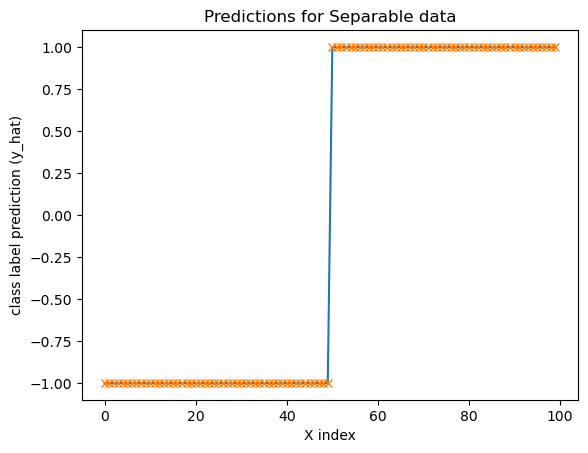

In [10]:
y_hat = perceptron.predict(X1)
plt.plot(y)
plt.plot(y_hat, 'x')
plt.title("Predictions for Separable data")
plt.xlabel("X index")
plt.ylabel("class label prediction (y_hat)")
plt.show();

### Linearly Non-Separable Data

Below, we run the `Perceptron` class on linearly non-separable data.

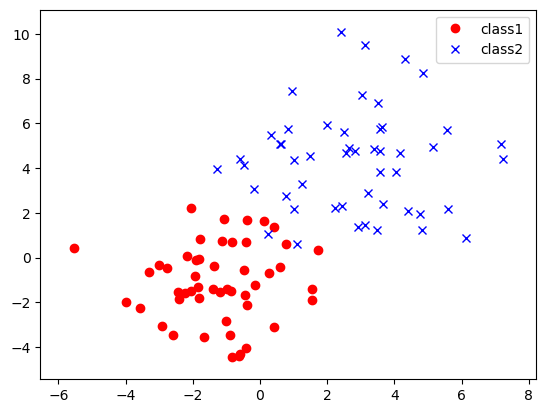

In [11]:
def nonseparable_data():
    mu1 = [-1, -1]
    cov1 = np.eye(2) * 3

    mu2 = [3, 4]
    cov2 = np.eye(2) * 5
    rng = np.random.RandomState(42)
    class1 = rng.multivariate_normal(mu1, cov1, 50)
    class2 = rng.multivariate_normal(mu2, cov2, 50)
    
    y = np.ones(len(class1)+len(class2))
    y[:len(y)//2] = -1

    return class1, class2, y

def plot_nonseparable_data():
    class1, class2, y = nonseparable_data()
    data = np.vstack([class1, class2])
    plt.plot(class1[:, 0], class1[:, 1], 'or', label='class1')
    plt.plot(class2[:, 0], class2[:, 1], 'xb', label='class2')
    
    plt.xlim([np.min(data[:, 0])-1, np.max(data[:, 0])+1])
    plt.ylim([np.min(data[:, 1])-1, np.max(data[:, 1])+1])
    plt.legend()
    plt.show()
plot_nonseparable_data()

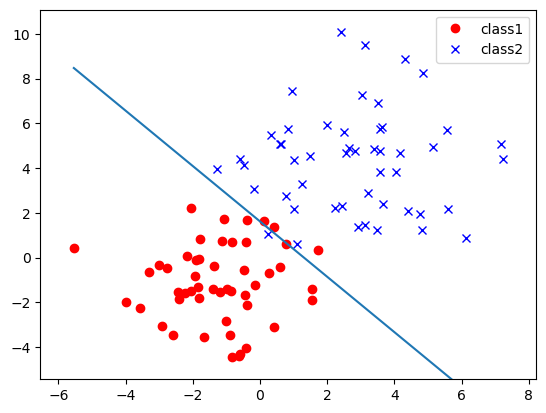

In [12]:
class1, class2, y = nonseparable_data()
X = np.vstack((class1, class2)) # Combine class data
X1 = np.hstack([np.ones((len(X), 1)), X]) # Add bias

perceptron =  Perceptron(
    eta0=.5, # Learning rate
    max_iter=10, # Number of epochs
    penalty=None,
    fit_intercept=False,
    random_state=42,
)
perceptron.fit(X1, y)
plot_decision_boundry(X1, y, perceptron.coef_.flatten())

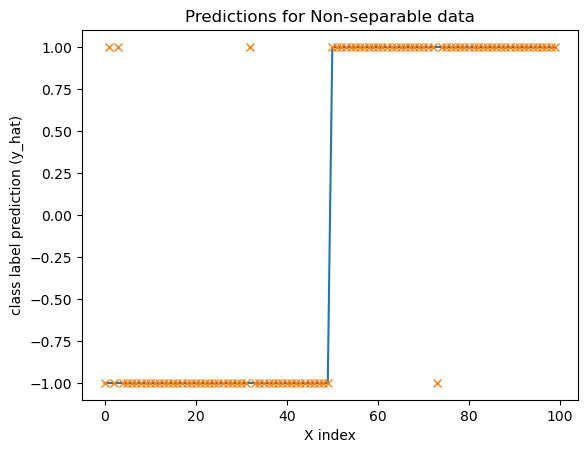

In [13]:
y_hat = perceptron.predict(X1)
plt.plot(y)
plt.plot(y_hat, 'x')
plt.title("Predictions for Non-separable data")
plt.xlabel("X index")
plt.ylabel("class label prediction (y_hat)")
plt.show();

### How to quantify performance? 
The next question is as follows: how do we assess how well the algorithm classified the data (i.e., what performance metrics can we use)? While for 1-dimensional datasets, we can visually or qualitatively tell how the algorithm is doing by looking at the decision boundary. Is there a way we can quantify the performance, like we did in linear regression.

One naive performance metric is to simply look at how many data samples we got wrong. One can do so using the following code. The first thing we need to do is find all the data samples where the predictions do not match their labels. We can do so using `np.where()` and passing the `y_hat != y` condition, which automatically checks if each element in `y_hat` equals the corresponding element in `y`. `np.where()` recall finds all the indexes that have elements equal to `True`.

In [14]:
y_hat != y

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
misclassified_locs = np.where(y_hat != y)[0]
misclassified_locs

array([ 1,  3, 32, 73])

As we can see, we misclassified 4 data samples. Let's see which classes where misclassfied. Notice we misclassified 3 samples from class 1 `class1` (label -1) and 1 sample from `class2` class 2 (label 1).

In [16]:
y[misclassified_locs]

array([-1., -1., -1.,  1.])

This is nice but there must be better metrics to give us a better understanding of our performance, right? Indeed there are!

# Performance Measures and Metrics
Choosing the right metric for evaluating classification data is crucial. Different classification metrics can tell you different things, some can even lead you to believe your model is performing better than it truly is!

## Accuracy

The most naive and common performance metric for evaluating classification data is *accuracy*. Accuracy reports the percentage of data samples that were CORRECTLY classification.  That is, when there are 1000 labels to classify, if 950 are correctly classified, we can say our model achieved 95% accuracy: 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

Below, we compute the accuracy for our `Perceptron` class instance received on the non-separable data. Here, we create a boolean array where the true values are the data samples predicted correctly, and the false values are the data samples predicted incorrectly.

In [17]:
y_hat == y

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Using `np.sum()` we can sum all the True values. By default, `np.sum()` will sum all values that are True!

In [18]:
np.sum(y_hat == y)

np.int64(96)

In [19]:
total_correct = np.sum(y_hat == y)

In [20]:
print(f"{total_correct} / {len(y)}")
accuracy = total_correct / len(y)
accuracy

96 / 100


np.float64(0.96)

Alternatively we can just use sklearn's `accuracy_score()` function.

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y, y_pred=y_hat)

0.96

### Issues

However, accuracy can be deceiving when working with imbalanced datasets. For instance, let's say we have 1000 labels to classify. This is a binary classification problem, so each label can be either class 1 or class 2. Let's say that class 1 has 900 data samples and class 2 only has 100 data samples. 

Further, let's say the trained model correctly classifies 900 data samples correctly. The caveat here is that it only classified the class 1 data samples correctly and classified all the class 2 data samples incorrectly. The model achieved this by simply predicting the class 1 label for all data samples. While we may have an accuracy of 90%, the model has misclassified all the class 2 samples. This is not something we typically want, so we need to use a different metric to account for this! 

Let's look at some other metrics that can overcome this issue of data imbalance.

## Confusion Matrix

<center><img src="http://www.andrewgurung.com/wp-content/uploads/2018/12/confusion_matrix.png" width=500 height=500></center>


Above is an example of a confusion matrix. A confusion matrix visualizes the performance of a model. Each row of the matrix represents the actual class values, while each column represents the predicted class values (i.e., ground truth).

In the binary classification case, a confusion matrix has 4 cells and one class is referred to as the negative class and the other is referred to as the positive class. The negative class is typically the class with the label 0 or -1. The positive class is typically the class with the label 1.

- True Negatives (TN): This is the number of *negative* class samples that were correctly classified.

- True Positive (TP): This is the number of *positive* class samples that were correctly classified.

- False Positive (FP): These are the number of *negative* class samples that were classified to be *positive* samples.

- False Negatives (FN): This is the number of *positive* class samples that were classified to be *negative* samples.

Using these four new metrics, we can also recompute the accuracy as follows:

$$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FN} + \text{FP}}.
$$

We can use Sklean's `confusion_matrix()` function to compute the confusion matrix for our `Perceptron` class instance received on the non-separable data. Note that Sklean's `confusion_matrix()` returns a NumPy array

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y, y_pred=y_hat)

array([[47,  3],
       [ 1, 49]])

Further we wrap the output of  Sklean's `confusion_matrix()` to make it prettier and easier to read.

In [23]:
def pretty_confusion_matrix(y_hat, y):
    cm = confusion_matrix(y_true=y, y_pred=y_hat)
    return pd.DataFrame(cm, columns=['class1', 'class2'], index=['class1', 'class2'])

In [24]:
pretty_confusion_matrix(y=y, y_hat=y_hat)

,class1,class2
class1,47,3
class2,1,49


Here our negative class is `class1` as its label is -1. Likewise, the positive class is `class1` as its label is 1.

-  True Negatives (TN): The model predicted 47 of the negative class samples correctly.

- True Positive (TP):The model predicted 49 of the positive class samples correctly.

- False Positive (FP): The model predicted 3 samples of the negative class `class1` as the positive class `class2`.

- False Negatives (FN): The model predicted 1 sample of the positive class `class2` as the negative class `class1`.



## Precision, Recall, and Specificity

Further, we can use the confusion matrix to compute new metric scores. The following metric scores are common scores used from values given to us by the confusion matrix.

The [wiki](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) has a great breakdown of these scores and many more. Note that the wiki reverses the placement of true negatives and true positives in the confusion matrix, but the same ideas still apply.


- **Positive predictive value (PPV)** (also called precision): The accuracy of positive predictions. In other words, PPV computes the ratio between the positive predictions that were correct over the total number of positive predictions made.

$$
\text{PPV} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **True Positive Rate (TPR)** (also called sensitivity or recall): TPR computes the ratio between the number of positive predictions that were correct over the total number of actual (i.e., *true*) positive class samples. This is a good measure to use for imbalanced datasets if your positive class is the minority class (i.e., the positive class has fewer data samples than the negative class)!

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **True Negative Rate (TNR)** (specificity): The accuracy of negative predictions. In other words, TNR computes the ratio between the number of negative predictions that were correct over the total number of actual (i.e., *true*) negative class samples. This is a good measure to use for imbalanced datasets if your negative class is the minority class (i.e., the negative class has fewer data samples than the positive class)!

$$
\text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

In [26]:
tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=y_hat).ravel()

print(f"True negative (TN): {tn}")
print(f"False positive (FP): {fp}")
print(f"False negative (FN): {fn}")
print(f"True positive (TP): {tp}")

True negative (TN): 47
False positive (FP): 3
False negative (FN): 1
True positive (TP): 49


Below we can see the accuracy, like before, is 96%.

In [27]:
accuracy_score(y_true=y, y_pred=y_hat)

0.96

Now we can see the precision or PPV score is lower than the accuracy because we have a higher number of false positives. Thus, out of all the positive predictions, the model got 94% of predicted positive samples correctly.

$$
\text{PPV} = \frac{\text{49}}{\text{49} + \text{3}}
$$


Notice recall or TPR is higher than accuracy because we are just looking at the positive data samples, and we correctly predicted almost all the positive class data samples except for 1! Thus, out of all the actual or true positive samples, the model predicted 98% of them correctly.

$$
\text{TPR} = \frac{\text{49}}{\text{49} + \text{1}}
$$

Once again, specificity or TNR is lower than both accuracy and recall for two reasons. It is lower than accuracy because we have a larger number of false positives. Additionally, it is lower than recall because we predicted less negative class samples as being correct! Thus, out of all the actual negative samples, our model predicted ~94% of them correctly.

$$
\text{TNR} = \frac{\text{47}}{\text{47} + \text{3}}
$$

# Formulating Multiclass Classification as Binary Classification

Recall that Rosenblatt's perceptron only works for binary classification problems. So what do we do if we have a multi-classification problem? We have two choices when answering this question.

1. One-vs-one: The first choice is to select only 2 classes from the data. Here, we can assign either class to be the positive or negative class.

2. One-vs-all: The second choice is to perform one-vs-all classification. This entails selecting one class to as the "positive" class, and then setting the rest of the classes to be the "negative" class. See the below image for a visual example.

<center><img src="https://miro.medium.com/max/1400/1*RElrybCZ4WPsUfRwDl7fqA.png" width=400 height=400></center>

## Code Example
How might we go about converting the labels for a multi-classification problem into a binary classification problem? It is actually quite easy. Let's take a look at a coding example for doing so.

Below we define some fake labels 1, 2, 3, and 4 for a 4-way classification problem denoted as `fake_y`.

In [31]:
fake_y = np.empty([100,])
fake_y[:25] = 1
fake_y[25:50] = 2
fake_y[50:75] = 3
fake_y[75:] = 4

print(f"fake_y shape: {fake_y.shape}")
fake_y

fake_y shape: (100,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

The first thing we need to decide is which classes will belong to the positive class and which will belong to the negative class. For this example, we will say the positive class will be class 3 (i.e., label 3) and all remaining class will be the negative class. To find all labels equal to 3, we use the `np.isin()` function, which returns a boolean array where true corresponds to which element is equal to 3. 

In [32]:
pos_locs = np.isin(fake_y, [3])
pos_locs

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Next, we do the same thing for the negative class labels. Except, this time, we pass the labels 1, 2, and 4.

In [33]:
neg_locs = np.isin(fake_y, [1, 2, 4])
neg_locs

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Now that we have the positive and negative class locations, we can get the corresponding values and change their labels. To do so, we simply index `y` by `pos_locs` and `neg_locs` and then we change their values to either 1 for the positive class or -1 for the negative class. **Additionally, you would need to index the data (e.g., `X`) at the same `pos_locs` and `neg_locs` to grab the corresponding positive and negative samples.**

In [34]:
y_pos = y[pos_locs]
y_pos[:] = 1
y_neg = y[neg_locs]
y_neg[:] = -1

y_pos, y_neg

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]))

Finally, we can stack the positive labels `y_pos` and negative labels `y_neg` back together to form a new array. **Likewise, you would need to stack the indexed data for the positive and negative samples back together in the same order as the labels.**

In [35]:
y_new = np.hstack([y_pos, y_neg])
y_new

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])